# Neural POS Tagging
In this notebook, we will use the `AnnPosTagger` and `LstmPosTagger` classes for POS Tagging. The source code for these classes can be found inside `pos_tagging/models/PosTagger.py`. 

For implementation details, please refer to the README of this repository.

# Import Modules

In [2]:
import numpy as np
import pickle
import importlib
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

from pos_tagging.tag_datasets import TagData # loading and preprocessing
from pos_tagging.models import PosTagger # contains AnnPosTagger class

# reload modules in case of changes to the files
importlib.reload(TagData)
importlib.reload(PosTagger)

TagDataset = TagData.TagDataset

# Load Data

In [3]:
trainData = TagDataset('./data/UD_English-Atis/en_atis-ud-train.conllu')
print("Vocabulary size:", len(trainData.vocabulary))
print("Number of Classes", len(trainData.classes))
devData = TagDataset('./data/UD_English-Atis/en_atis-ud-dev.conllu')
testData = TagDataset('./data/UD_English-Atis/en_atis-ud-test.conllu')

Vocabulary size: 865
Number of Classes 13


# Training the Model
## ANN

In [19]:
annTagger = PosTagger.AnnPosTagger(trainData, 
                                   devData, 
                                   futureContextSize=2,
                                   pastContextSize=2,
                                   activation='tanh', 
                                   embeddingSize=512,
                                   hiddenLayers=[64, 32],
                                   batchSize=128)
annTagger.train(epochs=20, learningRate=1e-3, verbose=True, retrain=True)

Epoch 1: train loss = 1.8404, dev loss = 1.7668, dev accuracy = 0.9302
Epoch 2: train loss = 1.7424, dev loss = 1.7301, dev accuracy = 0.961
Epoch 3: train loss = 1.723, dev loss = 1.7244, dev accuracy = 0.9666
Epoch 4: train loss = 1.7166, dev loss = 1.7227, dev accuracy = 0.9685
Epoch 5: train loss = 1.7087, dev loss = 1.7116, dev accuracy = 0.9782
Epoch 6: train loss = 1.7052, dev loss = 1.7094, dev accuracy = 0.9812
Epoch 7: train loss = 1.7034, dev loss = 1.7094, dev accuracy = 0.9812
Epoch 8: train loss = 1.7024, dev loss = 1.7077, dev accuracy = 0.9827
Epoch 9: train loss = 1.7018, dev loss = 1.7072, dev accuracy = 0.9828
Epoch 10: train loss = 1.7011, dev loss = 1.7063, dev accuracy = 0.9836
Epoch 11: train loss = 1.7008, dev loss = 1.7063, dev accuracy = 0.9831
Epoch 12: train loss = 1.7004, dev loss = 1.7066, dev accuracy = 0.9827
Epoch 13: train loss = 1.7005, dev loss = 1.7065, dev accuracy = 0.9828
Epoch 14: train loss = 1.7001, dev loss = 1.7066, dev accuracy = 0.9833
Epo

Let us visualize the training loss, dev loss, and dev accuracy for each epoch.

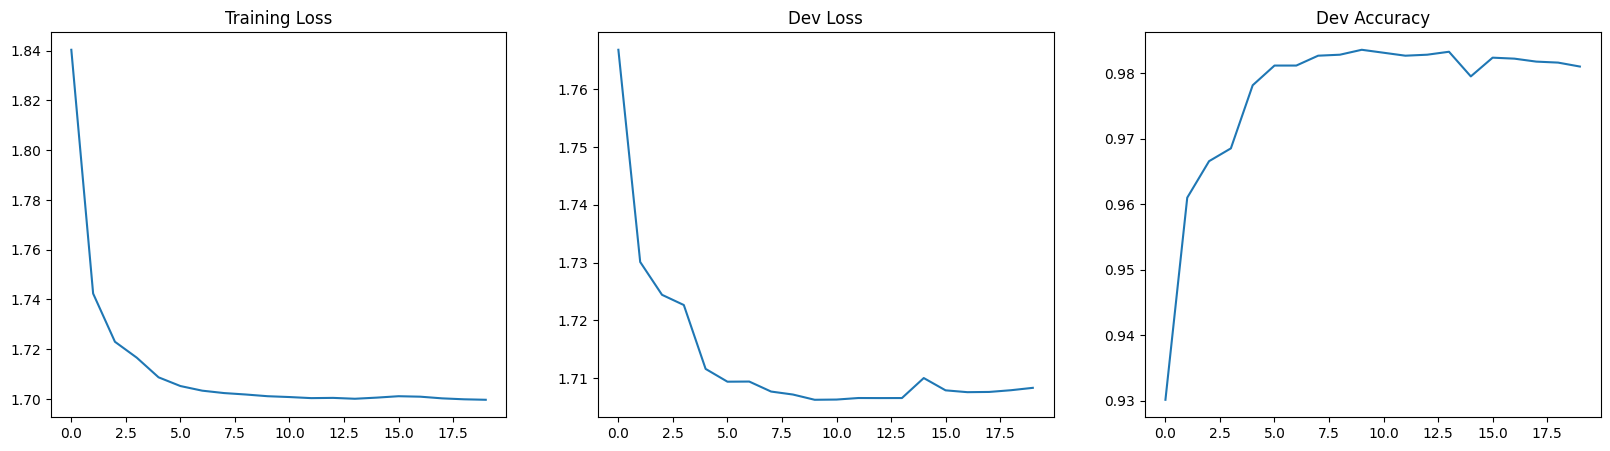

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].plot(annTagger.trainLoss)
ax[1].plot(annTagger.devLoss)
ax[2].plot(annTagger.devAccuracy)
ax[0].set_title('Training Loss')
ax[1].set_title('Dev Loss')
ax[2].set_title('Dev Accuracy')
plt.show()


## RNN

In [12]:
lstmTagger = PosTagger.LstmPosTagger(trainData,
                                     devData,
                                     activation='relu',
                                     embeddingSize=256,
                                     batchSize=1,
                                     hiddenSize=64,
                                     numLayers=2,
                                     bidirectional=True,
                                     linearHiddenLayers=[64, 32])
lstmTagger.train(epochs=15, learningRate=1e-3, verbose=True, retrain=True)

Epoch 1 | Train Loss: 2.127 | Dev Accuracy: 0.881
Epoch 2 | Train Loss: 2.103 | Dev Accuracy: 0.934
Epoch 3 | Train Loss: 2.101 | Dev Accuracy: 0.945
Epoch 4 | Train Loss: 2.100 | Dev Accuracy: 0.951
Epoch 5 | Train Loss: 2.099 | Dev Accuracy: 0.958
Epoch 6 | Train Loss: 2.099 | Dev Accuracy: 0.957
Epoch 7 | Train Loss: 2.099 | Dev Accuracy: 0.962
Epoch 8 | Train Loss: 2.099 | Dev Accuracy: 0.963
Epoch 9 | Train Loss: 2.099 | Dev Accuracy: 0.963
Epoch 10 | Train Loss: 2.099 | Dev Accuracy: 0.962


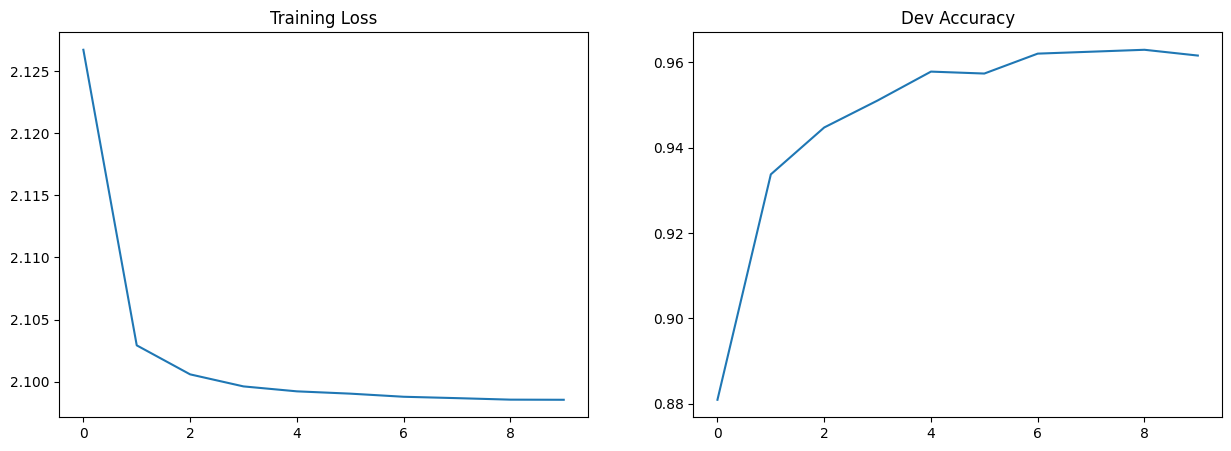

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(lstmTagger.trainLoss)
ax[1].plot(lstmTagger.devAccuracy)
ax[0].set_title('Training Loss')
ax[1].set_title('Dev Accuracy')
plt.show()

# Evalutation
## ANN Tagger
Let us test the model on a random sentence from the test set.

In [18]:
testData = TagDataset('./data/UD_English-Atis/en_atis-ud-test.conllu')
i = np.random.randint(0, len(testData.dataset))

sentence = [ word[1] for word in testData.dataset[i] ]
preds = annTagger.predict(sentence)

print(tabulate([['Sentence'] + sentence, 
                ['Predicted Tags'] + preds, 
                ['Actual Tags'] + [word[2] for word in testData.dataset[i]]], 
                tablefmt="fancy_grid"))

╒════════════════╤══════════╤═══════╤══════╤══════╤══════╤═══════╤══════════════╤═════╤═════════╤═════╤══════════╤════════╤═══════╕
│ Sentence       │ cheapest │ round │ trip │ fare │ from │ or    │ indianapolis │ to  │ orlando │ on  │ december │ twenty │ fifth │
├────────────────┼──────────┼───────┼──────┼──────┼──────┼───────┼──────────────┼─────┼─────────┼─────┼──────────┼────────┼───────┤
│ Predicted Tags │ ADJ      │ NOUN  │ NOUN │ NOUN │ ADP  │ CCONJ │ PROPN        │ ADP │ PROPN   │ ADP │ NOUN     │ NUM    │ ADJ   │
├────────────────┼──────────┼───────┼──────┼──────┼──────┼───────┼──────────────┼─────┼─────────┼─────┼──────────┼────────┼───────┤
│ Actual Tags    │ ADJ      │ NOUN  │ NOUN │ NOUN │ ADP  │ CCONJ │ PROPN        │ ADP │ PROPN   │ ADP │ NOUN     │ NUM    │ ADJ   │
╘════════════════╧══════════╧═══════╧══════╧══════╧══════╧═══════╧══════════════╧═════╧═════════╧═════╧══════════╧════════╧═══════╛


Let us view the classification report and the confusion matrix for the model.

              precision    recall  f1-score   support

         ADJ       0.91      0.97      0.94       220
         ADP       1.00      1.00      1.00      1434
         ADV       0.96      0.67      0.79        76
         AUX       0.98      0.99      0.99       256
       CCONJ       1.00      0.99      1.00       109
         DET       0.99      0.99      0.99       512
        INTJ       1.00      1.00      1.00        36
        NOUN       0.99      0.99      0.99      1166
         NUM       0.95      0.91      0.93       127
        PART       0.96      0.98      0.97        56
        PRON       0.99      0.99      0.99       392
       PROPN       0.99      0.99      0.99      1567
        VERB       1.00      0.98      0.99       629

    accuracy                           0.99      6580
   macro avg       0.98      0.96      0.97      6580
weighted avg       0.99      0.99      0.99      6580



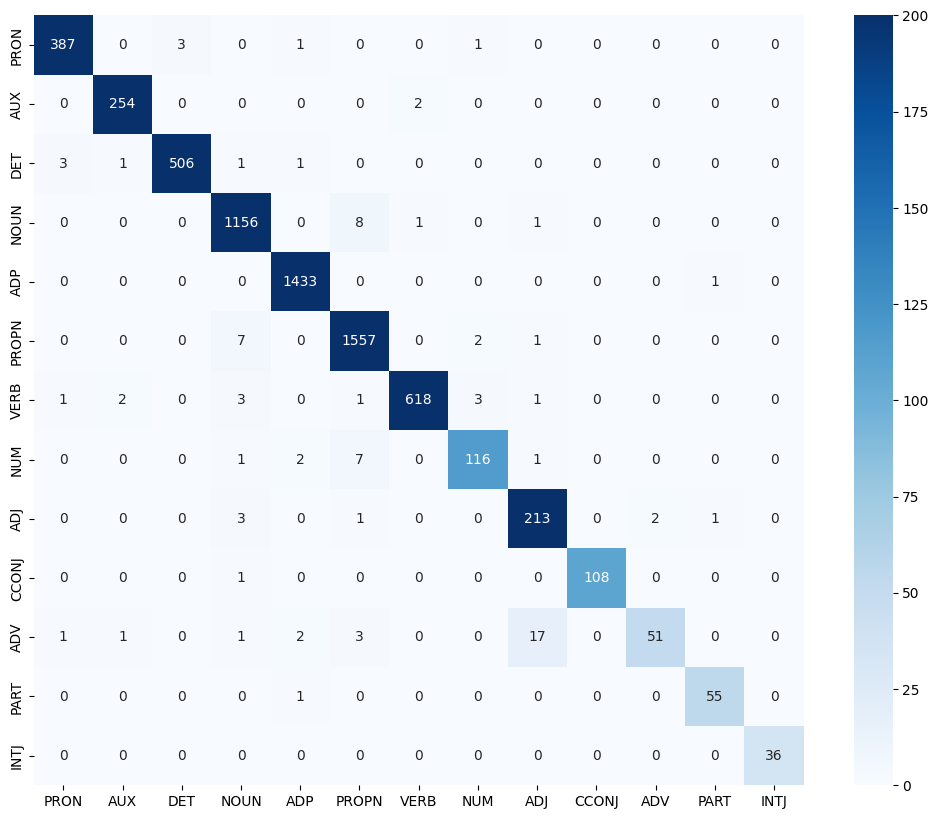

In [19]:
annTagger.evaluateModel(testData)
print(annTagger.classificationReport)

plt.figure(figsize=(13, 10))
sns.heatmap(annTagger.confusionMatrix, annot=True, square=True, fmt='d', cmap='Blues', vmax=200, xticklabels=lstmTagger.classes, yticklabels=lstmTagger.classes)
plt.show()

We can see that the model is sometimes predicts DET as a PRON but otherwise the performance is satisfactory.

## RNN Tagger

In [20]:
testData = TagDataset('./data/UD_English-Atis/en_atis-ud-test.conllu')
i = np.random.randint(0, len(testData.dataset))

sentence = [ word[1] for word in testData.dataset[i] ]
preds = lstmTagger.predict(sentence)

print(tabulate([['Sentence'] + sentence, 
                ['Predicted Tags'] + preds, 
                ['Actual Tags'] + [word[2] for word in testData.dataset[i]]], 
                tablefmt="fancy_grid"))

╒════════════════╤═══════╤═════════╤════════╤═════╤═══════╤═══════════╤════════╤═════╤══════╤══════╤══════╤═════╤══════════╤═════╤══════╕
│ Sentence       │ <UNK> │ leaving │ denver │ to  │ san   │ francisco │ before │ 10  │ am   │ what │ type │ of  │ aircraft │ is  │ used │
├────────────────┼───────┼─────────┼────────┼─────┼───────┼───────────┼────────┼─────┼──────┼──────┼──────┼─────┼──────────┼─────┼──────┤
│ Predicted Tags │ ADV   │ VERB    │ PROPN  │ ADP │ PROPN │ PROPN     │ ADP    │ NUM │ NOUN │ DET  │ NOUN │ ADP │ NOUN     │ AUX │ VERB │
├────────────────┼───────┼─────────┼────────┼─────┼───────┼───────────┼────────┼─────┼──────┼──────┼──────┼─────┼──────────┼─────┼──────┤
│ Actual Tags    │ VERB  │ VERB    │ PROPN  │ ADP │ PROPN │ PROPN     │ ADP    │ NUM │ NOUN │ DET  │ NOUN │ ADP │ NOUN     │ AUX │ VERB │
╘════════════════╧═══════╧═════════╧════════╧═════╧═══════╧═══════════╧════════╧═════╧══════╧══════╧══════╧═════╧══════════╧═════╧══════╛


              precision    recall  f1-score   support

         ADJ       0.81      0.90      0.85       220
         ADP       1.00      0.96      0.98      1434
         ADV       0.55      0.68      0.61        76
         AUX       0.93      0.98      0.96       256
       CCONJ       0.86      0.98      0.91       109
         DET       0.98      0.97      0.98       512
        INTJ       0.62      1.00      0.77        36
        NOUN       1.00      0.97      0.98      1166
         NUM       0.84      0.87      0.86       127
        PART       0.62      1.00      0.77        56
        PRON       0.95      0.98      0.97       392
       PROPN       0.99      0.99      0.99      1567
        VERB       0.96      0.89      0.93       629

    accuracy                           0.96      6580
   macro avg       0.86      0.94      0.89      6580
weighted avg       0.97      0.96      0.96      6580



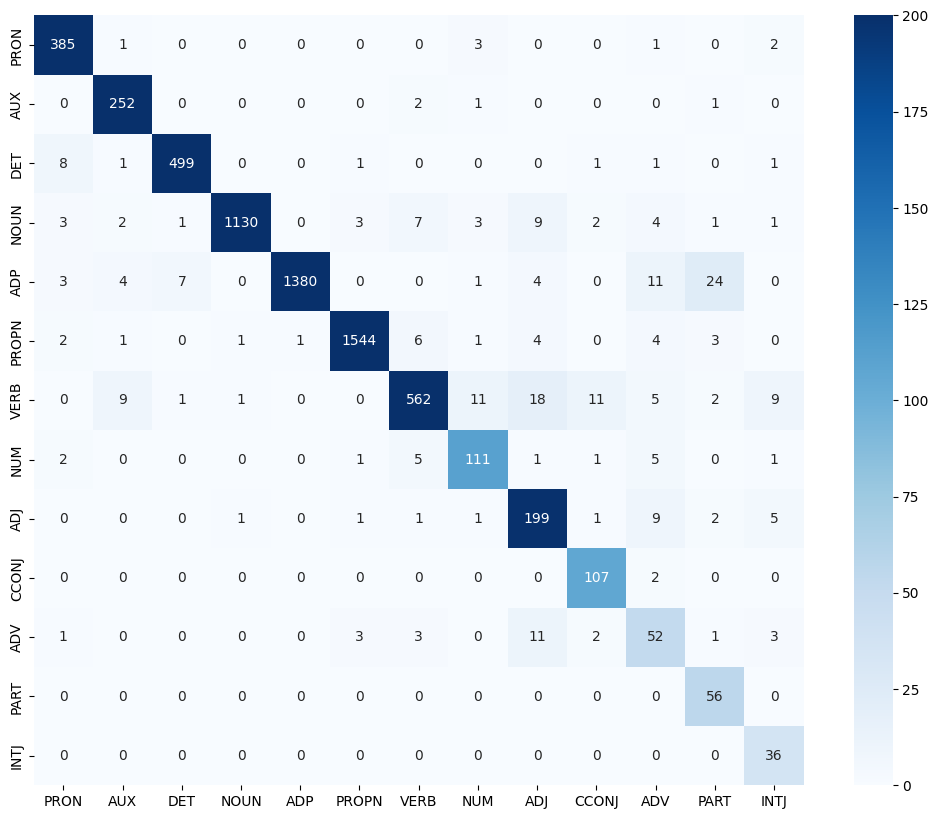

In [21]:
lstmTagger.evaluateModel(testData)
print(lstmTagger.classificationReport)

plt.figure(figsize=(13, 10))
sns.heatmap(lstmTagger.confusionMatrix, annot=True, square=True, fmt='d', cmap='Blues', vmax=200, xticklabels=lstmTagger.classes, yticklabels=lstmTagger.classes)
plt.show()

# Hyperparameter Tuning
## ANN Tagger

We will use a grid search on the hyperparameters to find the best model.

In [4]:
hiddenLayerss = [ [], [32], [64], [128], [128, 64], [64, 32] ]
embeddingSizes = [ 128, 256, 512 ]
activations = [ 'relu', 'sigmoid', 'tanh' ]
contextSizes = [ 0, 1, 2, 3, 4 ]
epochs = 20
lrs = [ 1e-3 ]
modelScores = {}

for hiddenlayers in hiddenLayerss:
    for embeddingSize in embeddingSizes:
        for activation in activations:
            for contextSize in contextSizes:
                for lr in lrs:
                    posTagger = PosTagger.AnnPosTagger(trainData,
                                                        devData,
                                                        futureContextSize=contextSize,
                                                        pastContextSize=contextSize,
                                                        activation=activation,
                                                        embeddingSize=embeddingSize,
                                                        hiddenLayers=hiddenlayers,
                                                        batchSize=128)
                    posTagger.train(epochs=epochs, learningRate=lr)
                    key = str( [hiddenlayers, embeddingSize, activation, contextSize, epochs, lr] )
                    modelScores[key] = {}
                    modelScores[key]['dev'] = posTagger.evaluateModel(devData)
                    modelScores[key]['train'] = posTagger.evaluateModel(trainData)
                    modelScores[key]['test'] = posTagger.evaluateModel(testData)
                    # save the modelScores dictionary to a file
                    with open('data/ann_model_scores.pkl', 'wb') as file:
                        pickle.dump(modelScores, file)

/home/ashmitchamoli/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
# top 10 models
annModelScores = pickle.load(open('data/ann_model_scores.pkl', 'rb'))

k = 5
topkModels = sorted(annModelScores.items(), key=lambda x: x[1]['dev']['f1'], reverse=True)[:k]

print(f"Dev set scores for the top {k} models:\n")
print(tabulate( [ [model[0]] + list(model[1]['dev'].values()) for model in topkModels ],
               headers=['Model Parameters (hiddenLayers, embeddingSize, activation, contextSize)', 'Dev Accuracy', 'Dev Precision', 'Dev Recall', 'Dev F1'] ) )

print(f"\nTest set scores for the best performing model on the dev set:\n")
print(tabulate( [ [ model[0] ] + list(model[1]['test'].values()) for model in topkModels[:1] ], 
               headers=['Model Parameters (hiddenLayers, embeddingSize, activation, contextSize)', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1'] ) )

Dev set scores for the top 5 models:

Model Parameters (hiddenLayers, embeddingSize, activation, contextSize)      Dev Accuracy    Dev Precision    Dev Recall    Dev F1
-------------------------------------------------------------------------  --------------  ---------------  ------------  --------
[[64, 32], 512, 'tanh', 1, 20, 0.001]                                            0.983895         0.983679      0.983895  0.983623
[[128], 256, 'sigmoid', 2, 20, 0.001]                                            0.982992         0.982791      0.982992  0.982718
[[128], 256, 'tanh', 1, 20, 0.001]                                               0.982842         0.982572      0.982842  0.982594
[[128], 128, 'relu', 2, 20, 0.001]                                               0.982842         0.982588      0.982842  0.982551
[[64], 256, 'relu', 2, 20, 0.001]                                                0.982691         0.982364      0.982691  0.982427

Test set scores for the best performing mode

Let us plot Dev accuracy vs context window size for the best performing model.

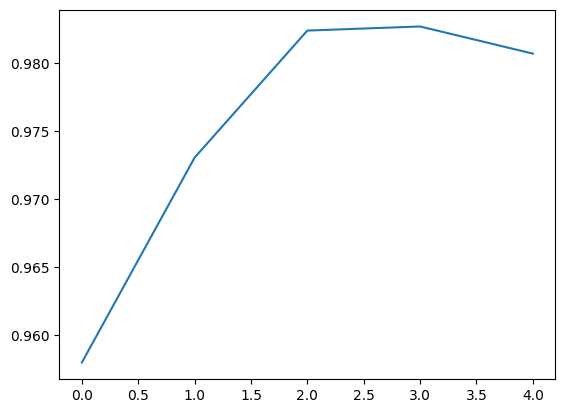

In [20]:
def trainBestModel(contextSize : int) -> None:
    posTagger = PosTagger.AnnPosTagger(trainData, 
                                       devData, 
                                       futureContextSize=contextSize,
                                       pastContextSize=contextSize,
                                       activation='tanh', 
                                       embeddingSize=512,
                                       hiddenLayers=[64, 32],
                                       batchSize=128)
    posTagger.train(epochs=30, learningRate=1e-3)
    posTagger.evaluateModel(devData)
    return posTagger

model0 = trainBestModel(0)
model1 = trainBestModel(1)
model2 = trainBestModel(2)
model3 = trainBestModel(3)
model4 = trainBestModel(4)

plt.plot([ 0, 1, 2, 3, 4 ], [ model0.scores['accuracy'], model1.scores['accuracy'], model2.scores['accuracy'], model3.scores['accuracy'], model4.scores['f1'] ])
plt.show()

We can see that the accuracy is the best for contextSize = 2.

## RNN Tagger


In [8]:
embeddingSizes = 128, 256
lr = 1e-3
hiddenSizes = 64, 128
hiddenLayerss = [64], [32, 16], [64, 32]
epochs = 30
activation = 'relu'
numLayerss = 1, 2, 3
lstmModelScores = {}

for hiddenSize in hiddenSizes:
    for hiddenLayers in hiddenLayerss:
        for numLayers in numLayerss:
            for embeddingSize in embeddingSizes:
                lstmTagger = PosTagger.LstmPosTagger(trainData,
                                                    devData,
                                                    activation=activation,
                                                    embeddingSize=embeddingSize,
                                                    hiddenSize=hiddenSize,
                                                    linearHiddenLayers=hiddenLayers,
                                                    batchSize=1,
                                                    bidirectional=True,
                                                    numLayers=numLayers)
                lstmTagger.train(epochs=epochs, learningRate=lr)
                lstmTagger.evaluateModel(devData)
                key = str([hiddenLayers, embeddingSize, hiddenSize, numLayers, activation, epochs, lr])
                lstmModelScores[key] = {}
                lstmModelScores[key]['dev'] = lstmTagger.evaluateModel(devData)
                lstmModelScores[key]['train'] = lstmTagger.evaluateModel(trainData)
                lstmModelScores[key]['test'] = lstmTagger.evaluateModel(testData)

                # save the lstmModelScores dictionary to a file
                with open('data/lstm_model_scores.pkl', 'wb') as file:
                    pickle.dump(lstmModelScores, file)

In [17]:
# top 10 models
lstmModelScores = pickle.load(open('data/lstm_model_scores.pkl', 'rb'))

k = 5
topkModels = sorted(lstmModelScores.items(), key=lambda x: x[1]['dev']['f1'], reverse=True)[:k]

print(f"Dev set scores for the top {k} models:\n")
print(tabulate( [ [model[0]] + list(model[1]['dev'].values()) for model in topkModels ],
               headers=['Model Parameters (hiddenLayers, embeddingSize, hiddenSize, numLayers)', 'Dev Accuracy', 'Dev Precision', 'Dev Recall', 'Dev F1'] ) )

print(f"\nTest set scores for the best performing model on the dev set:\n")
print(tabulate( [ [ model[0] ] + list(model[1]['test'].values()) for model in topkModels[:1] ], 
               headers=['Model Parameters (hiddenLayers, embeddingSize, hiddenSize, numLayers)', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1'] ) )

Dev set scores for the top 5 models:

Model Parameters (hiddenLayers, embeddingSize, hiddenSize, numLayers)      Dev Accuracy    Dev Precision    Dev Recall    Dev F1
-----------------------------------------------------------------------  --------------  ---------------  ------------  --------
[[64, 32], 256, 64, 2, 'relu', 30, 0.001]                                      0.97065          0.972459      0.97065   0.971081
[[64, 32], 256, 128, 2, 'relu', 30, 0.001]                                     0.970349         0.973412      0.970349  0.971079
[[64], 128, 128, 2, 'relu', 30, 0.001]                                         0.970048         0.97384       0.970048  0.971017
[[32, 16], 256, 128, 2, 'relu', 30, 0.001]                                     0.970349         0.972859      0.970349  0.970926
[[32, 16], 256, 128, 3, 'relu', 30, 0.001]                                     0.970349         0.972418      0.970349  0.97083

Test set scores for the best performing model on the dev se

Epoch vs. Dev Accuracy graph for the 3 best models, based on dev set scores.

In [ ]:
lstmModel1 = PosTagger.LstmPosTagger(trainData, devData, activation='relu', embeddingSize=256, hiddenSize=64, linearHiddenLayers=[64, 32], batchSize=1, bidirectional=True)
lstmModel1.train(epochs=20, learningRate=1e-3, retrain=True)

lstmModel2 = PosTagger.LstmPosTagger(trainData, devData, activation='relu', embeddingSize=128, hiddenSize=128, linearHiddenLayers=[64], batchSize=1, bidirectional=True)
lstmModel2.train(epochs=20, learningRate=1e-3, retrain=True)

lstmModel3 = PosTagger.LstmPosTagger(trainData, devData, activation='relu', embeddingSize=128, hiddenSize=64, linearHiddenLayers=[64, 32], batchSize=1, bidirectional=True)
lstmModel3.train(epochs=20, learningRate=1e-3, retrain=True)

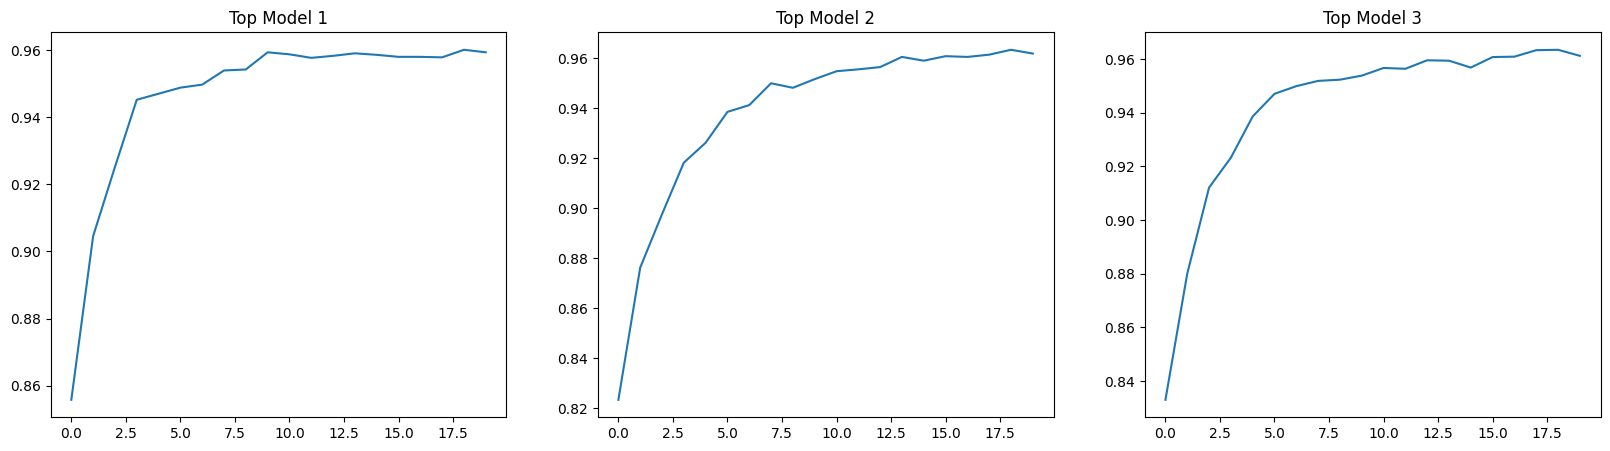

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].plot(lstmModel1.devAccuracy)
ax[1].plot(lstmModel2.devAccuracy)
ax[2].plot(lstmModel3.devAccuracy)
ax[0].set_title('Top Model 1')
ax[1].set_title('Top Model 2')
ax[2].set_title('Top Model 3')
plt.show()